In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
dataset  = pd.read_csv("fake_job_postings.csv")

dataset.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [34]:
dataset.size

321840

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [36]:
dataset['title'].value_counts()

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
                                                     ... 
Plumber Helper - $1,000 Bonus Available                 1
Mobile Developer (m/f)                                  1
Social Media Marketer                                   1
Need 2 Oracle Apps DBA with Goldengate                  1
iOS / Cocoa Developer                                   1
Name: title, Length: 11231, dtype: int64

In [37]:
dataset['department'].value_counts()

Sales                        551
Engineering                  487
Marketing                    401
Operations                   270
IT                           225
                            ... 
Online PR                      1
Cocolife Asset Management      1
Staffing                       1
Careers Sales                  1
MX                             1
Name: department, Length: 1337, dtype: int64

In [38]:
title = dataset['title'].unique()
print(title)

['Marketing Intern' 'Customer Service - Cloud Video Production'
 'Commissioning Machinery Assistant (CMA)' ...
 'Senior Financial Analyst (Retail) ' 'Account Director - Distribution '
 'Project Cost Control Staff Engineer - Cost Control Exp - TX']


In [39]:
dataset.interpolate(inplace=True)

In [40]:
dataset.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [41]:
dataset.fillna('',inplace=True)
print(dataset.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing               We're Food52, and we've created a groundbreaki...   
1    Success               90 Seconds, the worlds Cloud Video Production ...   
2                          Valor Services provides Workforce Solutions th...   
3      Sales               Our passion for improving quality of life thro...   
4                          SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [42]:
import seaborn as sns

,fraudulent,title
0,0,17014
1,1,866


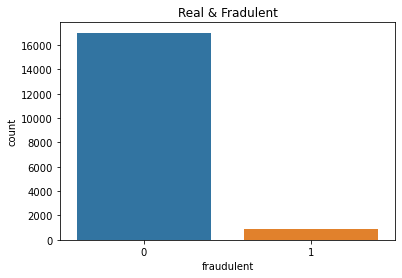

In [43]:
sns.countplot(dataset.fraudulent).set_title('Real & Fradulent')
dataset.groupby('fraudulent').count()['title'].reset_index().sort_values(by='title',ascending=False)

In [44]:
def split(location):
    l = location.split(',')
    return l[0]

dataset['country'] = dataset.location.apply(split)

Text(0.5, 0, 'Countries')

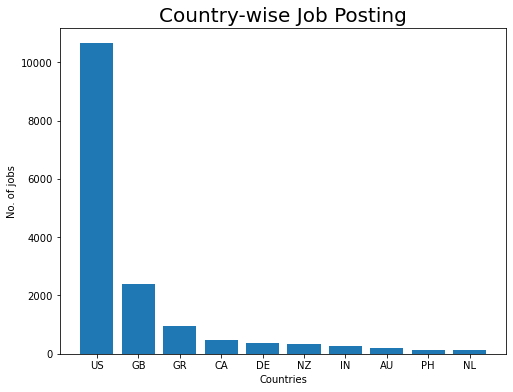

In [45]:
country = dict(dataset.country.value_counts()[:11])
del country['']
plt.figure(figsize=(8,6))
plt.title('Country-wise Job Posting', size=20)
plt.bar(country.keys(), country.values())
plt.ylabel('No. of jobs', size=10)
plt.xlabel('Countries', size=10)

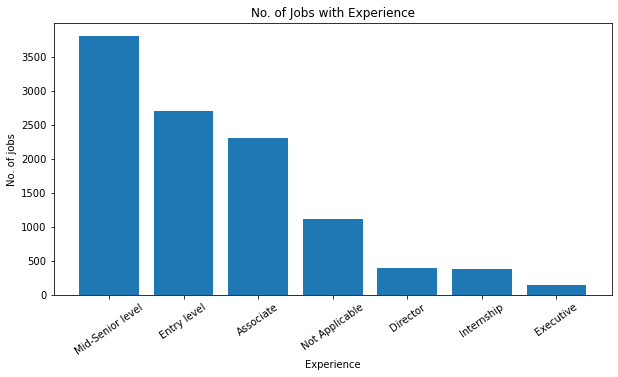

In [46]:
experience = dict(dataset.required_experience.value_counts())
del experience['']
plt.figure(figsize=(10,5))
plt.bar(experience.keys(), experience.values())
plt.title('No. of Jobs with Experience')
plt.xlabel('Experience', size=10)
plt.ylabel('No. of jobs', size=10)
plt.xticks(rotation=35)
plt.show()

In [47]:
print(dataset.title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        75
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [48]:
print(dataset[dataset.fraudulent==1].title.value_counts()[:10])

Home Based Payroll Typist/Data Entry Clerks Positions Available         21
Cruise Staff Wanted *URGENT*                                            21
Data Entry Admin/Clerical Positions - Work From Home                    21
Customer Service Representative                                         17
Administrative Assistant                                                16
Home Based Payroll Data Entry Clerk Position - Earn $100-$200 Daily     12
Payroll Clerk                                                           10
Payroll Data Coordinator Positions - Earn $100-$200 Daily               10
Network Marketing                                                       10
Account Sales Managers $80-$130,000/yr                                  10
Name: title, dtype: int64


In [49]:
print(dataset[dataset.fraudulent==0].title.value_counts()[:10])

English Teacher Abroad                                311
Customer Service Associate                            146
Graduates: English Teacher Abroad (Conversational)    144
English Teacher Abroad                                 95
Software Engineer                                      86
English Teacher Abroad (Conversational)                83
Customer Service Associate - Part Time                 76
Account Manager                                        73
Web Developer                                          66
Project Manager                                        62
Name: title, dtype: int64


In [50]:
dataset['function'].value_counts()
stem = ['Information Technology', 'Engineering', 'Data Analyst', 'Science', 'Business Analyst', 'Quality Assurance']
non_stem = ['Sales', 'Customer Service', 'Marketing', 'Administrative', 'Design', 'Human Resources']


df_stem = dataset[dataset['function'].isin(stem)]
df_non_stem = dataset[dataset['function'].isin(non_stem)]


print(df_stem.shape)
print(df_non_stem.shape)


df_non_stem['fraudulent'].value_counts()

(3388, 19)
(4702, 19)


0    4453
1     249
Name: fraudulent, dtype: int64

In [1]:
df_real = dataset.loc[dataset['fraudulent']==0]
df_fake =dataset.loc[dataset['fraudulent']==1]
df_real['description'] = df_real['description'].astype('str')
df_fake['description'] = df_fake['description'].astype('str')

NameError: name 'dataset' is not defined

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection

from sklearn.impute import SimpleImputer
import numpy as np


dataset['department'] = dataset['department'].fillna(dataset['department'].mode()[0])

data_cat_imp=SimpleImputer(strategy="constant",fill_value="Missing")
cat_imp_feature=["title","location","department","salary_range","company_profile","description","requirements","benefits",
                 "employment_type","required_experience","required_education","industry","function"]

# Filling the Numerical values through existing value
data_num_imp=SimpleImputer(strategy="constant",fill_value=None)
num_imp_feature =["job_id","telecommuting","has_company_logo","has_questions","fraudulent"]

# Transforming into column
data_imp_trans=ColumnTransformer([("data_cat_imp",data_cat_imp,cat_imp_feature),
                                 ("data_num_imp",data_num_imp,num_imp_feature)])

# Transforming and assigning the data
transformed_data=data_imp_trans.fit_transform(dataset)
transformed_data

#Transforming the data into data frame
df_job_transformed_data=pd.DataFrame(transformed_data,
                         columns=["title","location","department","salary_range","company_profile","description",
                                  "requirements","benefits", "employment_type","required_experience","required_education",
                                  "industry","function","job_id","telecommuting","has_company_logo","has_questions",
                                  "fraudulent"])

X_trans = df_job_transformed_data.drop("fraudulent",axis=1)
y_trans = df_job_transformed_data.fraudulent
y_trans=y_trans.astype('int')

X_trans.shape, y_trans.shape,X_trans.columns

# Instantation of One Hot Encoder for categorical data tarnsformatio into Numeric 
one_hot=OneHotEncoder()
clf_trans=ColumnTransformer([("one_hot",one_hot,cat_imp_feature)],remainder="passthrough")
X_trans_fin=clf_trans.fit_transform(X_trans)
np.array(X_trans_fin)

X_train,X_test,y_train,y_test=train_test_split(X_trans_fin,y_trans,test_size=0.25, random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13410, 51439), (4470, 51439), (13410,), (4470,))

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Random forest
model_rfm=RandomForestClassifier(random_state=42)
model_rfm.fit(X_train,y_train)
y_pred_rfm = model_rfm.predict(X_test)
rfc_accuracy = model_rfm.score(X_test, y_test)

# Decision Tree
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train, y_train)
y_pred_dtc = model_dtc.predict(X_test)
dtc_accuracy = model_dtc.score(X_test, y_test)

# Logistic regression
model_logreg = LogisticRegression(solver='newton-cg', random_state=42)
model_logreg.fit(X_train, y_train)
y_prob = model_logreg.predict_proba(X_test)
Y_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index = y_test.index)
lg_accuracy = model_logreg.score(X_test, y_test)

# Neural Network
clf = MLPClassifier(hidden_layer_sizes=(10,10,10,), max_iter=100,
                     activation='logistic', solver='lbfgs', learning_rate='constant', verbose=1,  random_state=42)  
clf.fit(X_train,y_train)
y_pred_test = clf.predict(X_test)
nn_accuracy = accuracy_score(y_pred_test,y_test)

print("Random Forest accuracy", rfc_accuracy)
print("Decision Tree accuracy", dtc_accuracy)
print("Logistic Regression accuracy", lg_accuracy)
print("Neural Network accuracy", nn_accuracy)

Random Forest accuracy 0.9829977628635347
Decision Tree accuracy 0.9879194630872483
Logistic Regression accuracy 0.9818791946308725
Neural Network accuracy 0.9501118568232663
